In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data3=pd.read_csv("Hospital_data.csv")

In [3]:
data3.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data3.shape

(110527, 14)

In [5]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
data3.duplicated().sum()

0

In [7]:
data3.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
data3['Handcap'].value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [9]:
data3["Age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [10]:
data3.drop(['PatientId',"AppointmentID"],axis=1,inplace=True)
data3.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [11]:
data3.AppointmentDay.unique

<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object>

In [12]:
data3['ScheduledDay']=data3['ScheduledDay'].str[:10]
data3['AppointmentDay']=data3['AppointmentDay'].str[:10]

data3['ScheduledDay']=pd.to_datetime(data3['ScheduledDay'])
data3['AppointmentDay']=pd.to_datetime(data3['AppointmentDay'])

print(data3[['AppointmentDay','ScheduledDay']].dtypes)
data3.head()

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
data3['due-days']=data3['AppointmentDay']-data3['ScheduledDay']
data3['due-days']=data3['due-days'].dt.days
data3.drop(['AppointmentDay','ScheduledDay'],axis=1,inplace=True)

In [14]:
data3.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [15]:
data3['due-days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

In [16]:
data3[data3['due-days']<0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [17]:
data3.drop(data3[data3['due-days']<0].index,inplace=True)
data3['due-days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

In [18]:
data3['Gender']=data3['Gender'].astype('category')
data3['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False, categories_dtype=object)

In [19]:
cols=['Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received']
data3[cols]=data3[cols].astype('bool')
data3[cols].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

In [20]:
data3.loc[data3['No-show']=='Yes','No-show']=0
data3.loc[data3['No-show']=='No','No-show']=1

data3['No-show']=data3['No-show'].astype(bool)
data3['No-show'].dtype

dtype('bool')

In [21]:
data3[data3['Handcap']>1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
946,M,94,BELA VISTA,False,True,True,False,2,True,True,15
1665,M,64,SANTA MARTHA,False,True,False,True,2,True,True,30
1666,M,64,SANTA MARTHA,False,True,False,True,2,False,True,30
2071,M,64,SANTA MARTHA,False,True,False,True,2,False,True,0
2091,F,11,ANDORINHAS,False,False,False,False,2,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
108376,F,44,ROMÃO,False,True,True,False,2,True,True,6
109484,M,64,DA PENHA,False,True,True,False,2,False,True,2
109733,F,34,JUCUTUQUARA,False,False,False,False,2,True,True,4
109975,M,39,PRAIA DO SUÁ,True,False,False,False,2,True,True,4


In [22]:
data3.loc[data3['Handcap'].isin([2,3,4]),'Handcap']=1

data3['Handcap']=data3['Handcap'].astype('bool')
data3['Handcap'].unique()

array([False,  True])

In [23]:
data3[data3['Age']<0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
99832,F,-1,ROMÃO,False,False,False,False,False,False,True,0


In [24]:
data3.drop(data3[data3['Age']<0].index,inplace=True)

In [25]:
data3.describe()

,Age,due-days
count,110521.000000,110521.000000
mean,37.089386,10.184345
std,23.109885,15.255153
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,4.000000
75%,55.000000,15.000000
max,115.000000,179.000000


In [26]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Gender         110521 non-null  category
 1   Age            110521 non-null  int64   
 2   Neighbourhood  110521 non-null  object  
 3   Scholarship    110521 non-null  bool    
 4   Hipertension   110521 non-null  bool    
 5   Diabetes       110521 non-null  bool    
 6   Alcoholism     110521 non-null  bool    
 7   Handcap        110521 non-null  bool    
 8   SMS_received   110521 non-null  bool    
 9   No-show        110521 non-null  bool    
 10  due-days       110521 non-null  int64   
dtypes: bool(7), category(1), int64(2), object(1)
memory usage: 4.2+ MB


C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


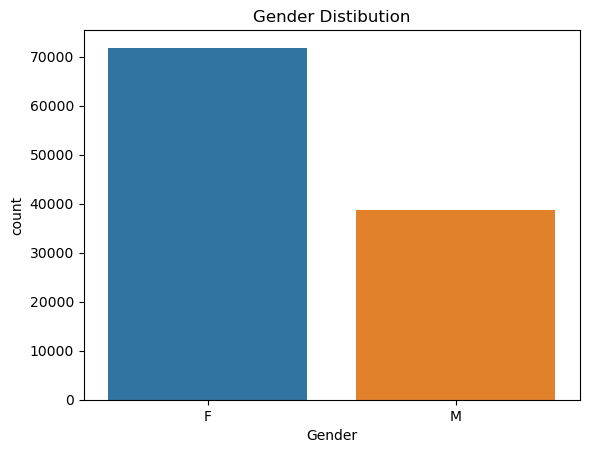

In [27]:
sns.countplot(x='Gender',data=data3)
plt.title("Gender Distibution")
plt.show()

C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


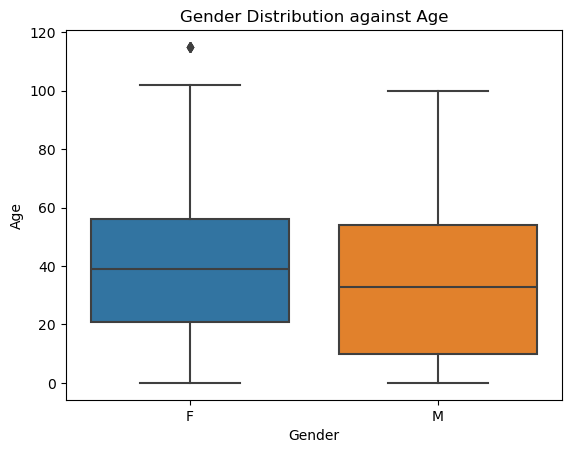

In [28]:
sns.boxplot(x='Gender',y='Age',data=data3)
plt.title("Gender Distribution against Age")
plt.show()

In [29]:
data3['No-show'].value_counts()

No-show
True     88207
False    22314
Name: count, dtype: int64

C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

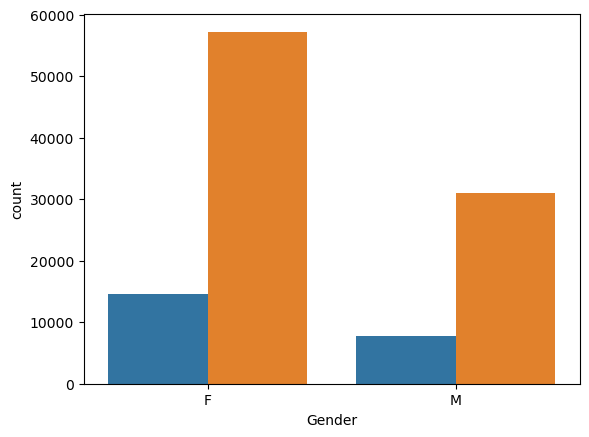

In [30]:
sns.countplot(x='Gender',data=data3,hue='No-show')
plt.title('gender destribution with respect to no-show columns')
plt.show()

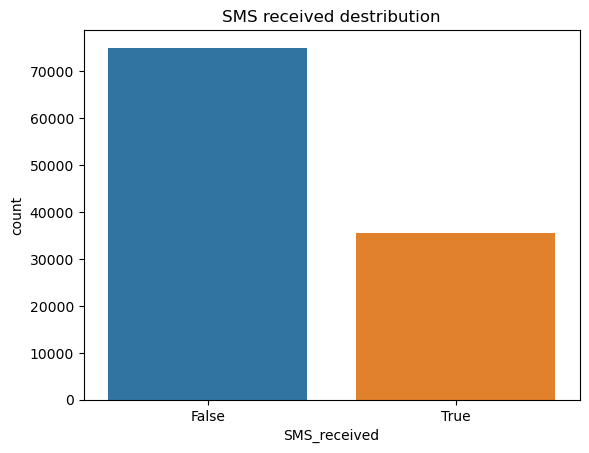

In [31]:
sns.countplot(x='SMS_received',data=data3)
plt.title('SMS received destribution')
plt.show()

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

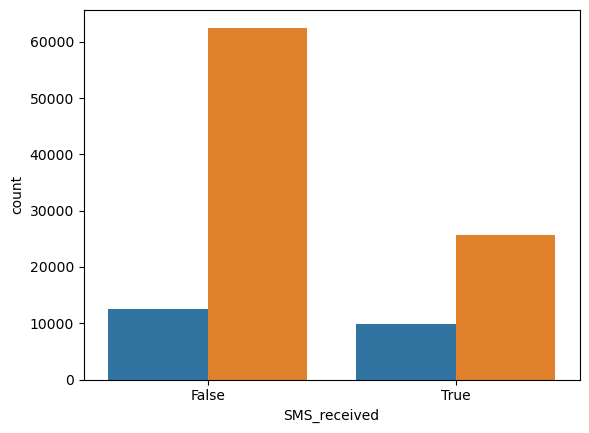

In [32]:
sns.countplot(x='SMS_received',data=data3,hue='No-show')
plt.title('gender destribution with respect to no-show columns')
plt.show()

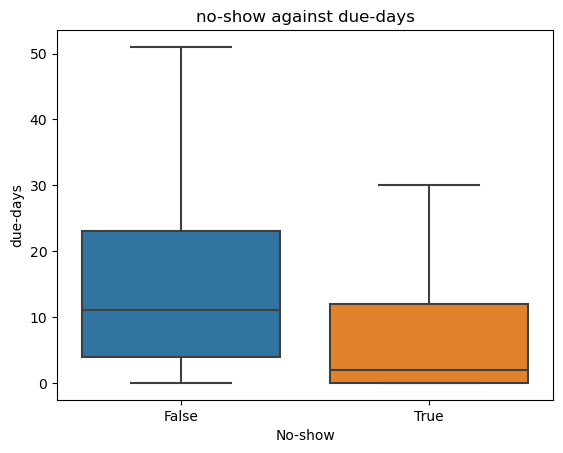

In [35]:
sns.boxplot(x='No-show',y='due-days', data=data3, showfliers=False)
plt.title('no-show against due-days')
plt.show()

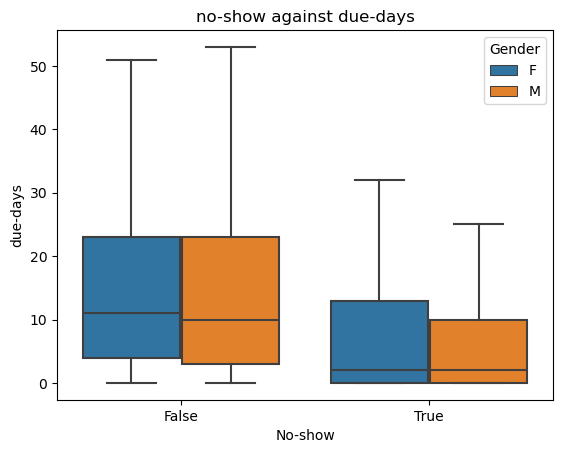

In [36]:
sns.boxplot(x='No-show',y='due-days', data=data3, hue='Gender', showfliers=False)
plt.title('no-show against due-days')
plt.show()

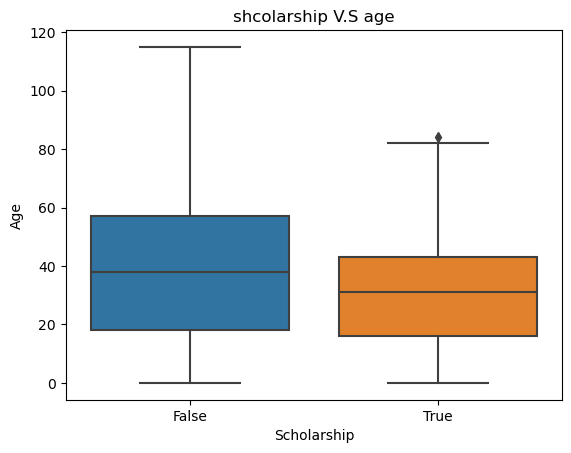

In [39]:
sns.boxplot(x='Scholarship', y='Age',data=data3)
plt.title('shcolarship V.S age')
plt.show()

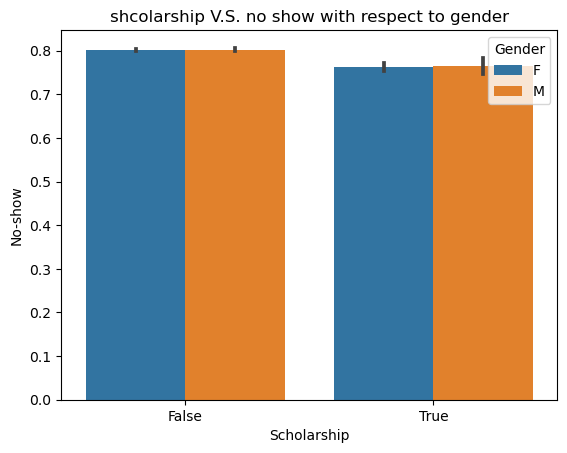

In [40]:
sns.barplot(x='Scholarship', y='No-show',hue='Gender', data=data3)
plt.title('shcolarship V.S. no show with respect to gender')
plt.show()

<Axes: >

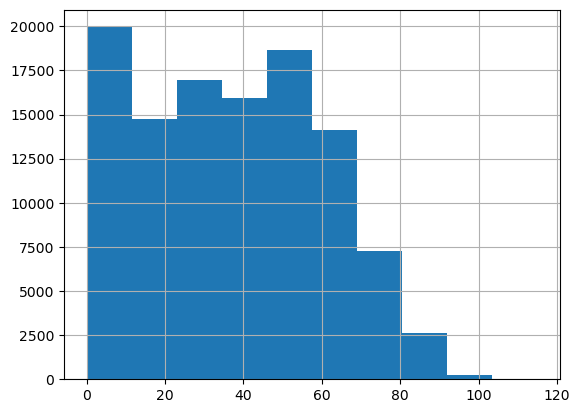

In [41]:
data3['Age'].hist(bins=10)

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

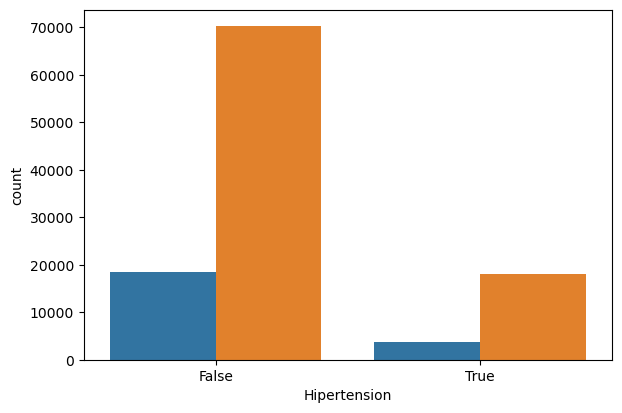

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x='Hipertension', data=data3,hue='No-show')
plt.subplot(2,2,2)
sns.countplot(x='Diabetes', data=data3,hue='No-show')
plt.subplot(2,2,3)
sns.countplot(x='Alcoholism', data=data3,hue='No-show')
plt.subplot(2,2,4)
sns.countplot(x='Handcap', data=data3,hue='No-show')
plt.show()




AttributeError: 'numpy.bool_' object has no attribute 'startswith'

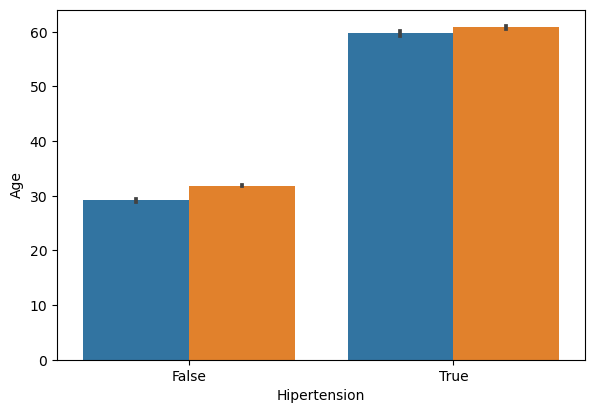

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hipertension', y = 'Age', data = data3, hue= 'No-show')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = data3, hue= 'No-show')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = data3, hue= 'No-show')
plt.subplot(2,2,4)
sns.barplot(x = 'Handcap', y = 'Age', data = data3, hue= 'No-show')
plt.show()